# Pipelines

Ich code hier all meine Modelle im default und packe sie danach in einen Stacker. Dann vergleiche ich die Ergebnisse. 
Ggf. muss ich danach noch Parametertuning betreiben, wenn ich nur Schrott heraus bekomme. 

**Modelle:**

1. Lineare Regression
2. Elastic Net Regression
3. k-Nearest-Neighbors Regression
4. Random Forest Regression
5. Support Vector Regression
6. Stacker

C:\Users\test\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


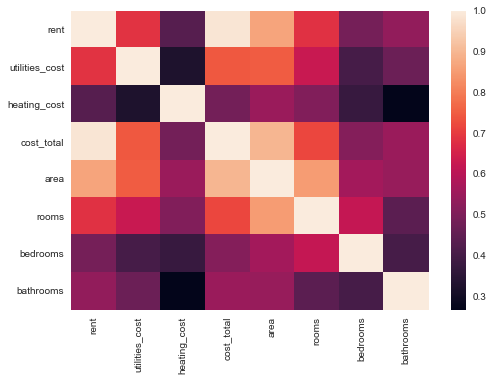

In [1]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from validation_metric import total_validation
import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.regressor import ResidualsPlot
from yellowbrick.regressor import PredictionError


#load data
df = pd.read_csv("C:/Users/test/Documents/GitHub/bachelorarbeit/_climate_change_mitigation/data/processed/berlin_preprocessed.csv")


_=sns.heatmap(df.iloc[:,1:9].corr())
plt.show()

# Drop 'cost_total' due to high correlation -> colliniarity?
df = df.drop('cost_total', axis=1)

# split data
X = df.iloc[:,1:]
y = df.iloc[:,0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

                 value
MAE              25.83
MAPE (%)         21.67
MSE            1223.72
RMSE (Units)     34.98
r-squared (%)    23.42


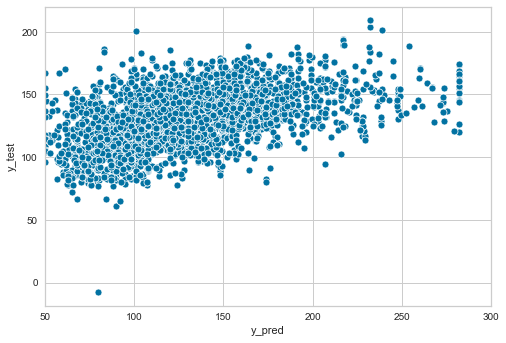

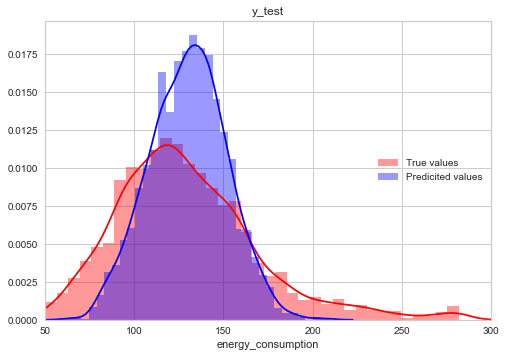

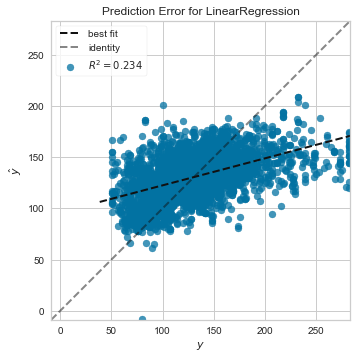

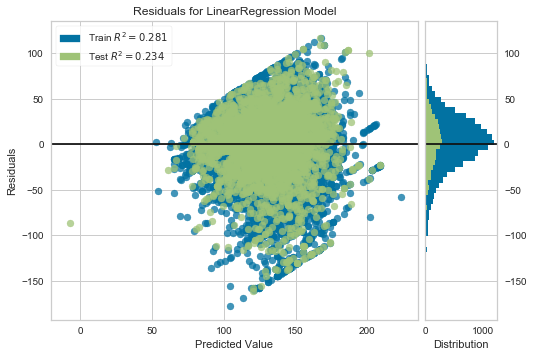

In [2]:
# LinReg:

from sklearn.linear_model import LinearRegression

steps = [
    ('scaler', StandardScaler()),
    ('normalizer', MinMaxScaler()),
    ('LinReg', LinearRegression())]

pipeline = Pipeline(steps)

LinReg_scaled = pipeline.fit(X_train, y_train)
y_pred = LinReg_scaled.predict(X_test)

metric_LinReg = total_validation(y_test, y_pred)

print(metric_LinReg)


_ = sns.scatterplot(y_test, y_pred)
_ = plt.xlim(50, 300)
_ = plt.ylabel('y_test')
_ = plt.xlabel('y_pred')
plt.show()

_ = sns.distplot(y_test, color = 'red', label = 'True values') #, rug=True
_ = sns.distplot(y_pred, color = 'blue', label = 'Predicited values')
_ = plt.title('y_test')
_ = plt.legend(loc = 7)
_ = plt.xlim(50, 300)
plt.show()

visualizer = PredictionError(pipeline)
visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)  
visualizer.show()

visualizer = ResidualsPlot(pipeline)
visualizer.fit(X_train, y_train) 
visualizer.score(X_test, y_test)  
visualizer.show() 

                 value
MAE              29.18
MAPE (%)         24.97
MSE            1481.84
RMSE (Units)     38.49
r-squared (%)     7.26


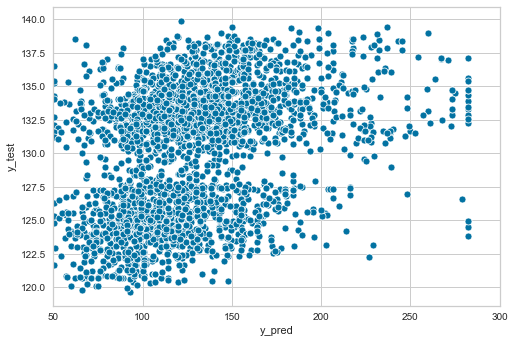

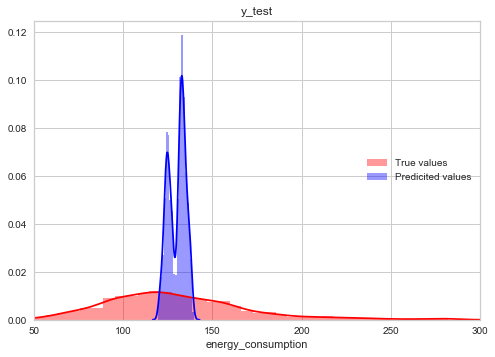

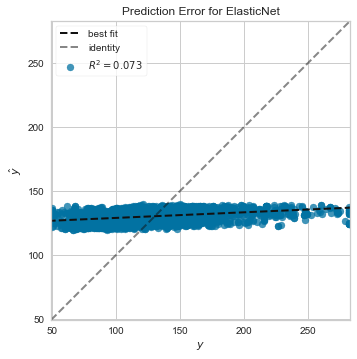

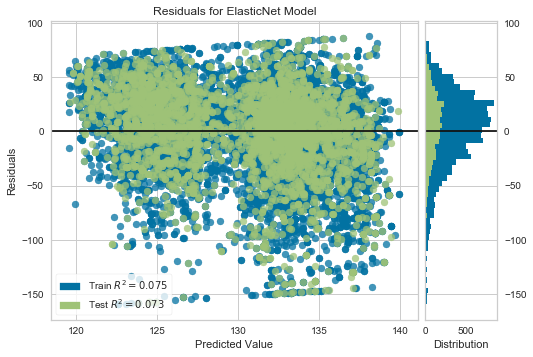

In [3]:
# ElasticNet:

from sklearn.linear_model import ElasticNet

steps = [
    ('scaler', StandardScaler()),
    ('normalizer', MinMaxScaler()),
    ('ElasticNet', ElasticNet())] #Parameter checken. alpha=0.1, l1_ratio=0.5, tol=0.9

pipeline = Pipeline(steps)

ElasticNet_scaled = pipeline.fit(X_train, y_train)
y_pred = ElasticNet_scaled.predict(X_test)

metric_ElasticNet = total_validation(y_test, y_pred)

print(metric_ElasticNet)

_ = sns.scatterplot(y_test, y_pred)
_ = plt.xlim(50, 300)
_ = plt.ylabel('y_test')
_ = plt.xlabel('y_pred')
plt.show()

_ = sns.distplot(y_test, color = 'red', label = 'True values')
_ = sns.distplot(y_pred, color = 'blue', label = 'Predicited values')
_ = plt.title('y_test')
_ = plt.legend(loc = 7)
_ = plt.xlim(50, 300)
plt.show()

visualizer = PredictionError(pipeline)
visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)  
visualizer.show()

visualizer = ResidualsPlot(pipeline)
visualizer.fit(X_train, y_train) 
visualizer.score(X_test, y_test)  
visualizer.show() 

                 value
MAE              22.68
MAPE (%)         19.01
MSE            1075.80
RMSE (Units)     32.80
r-squared (%)    32.67


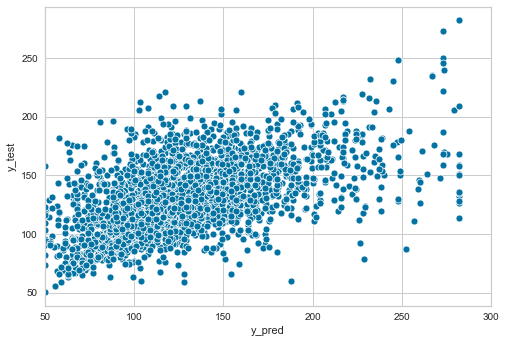

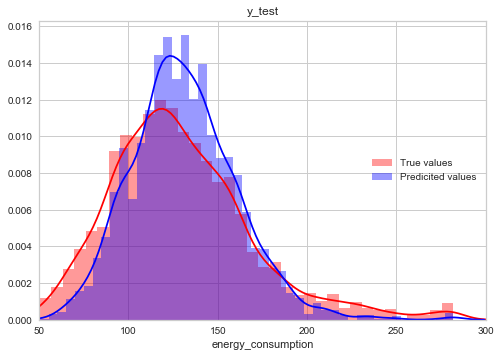

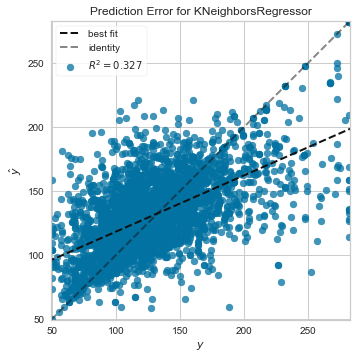

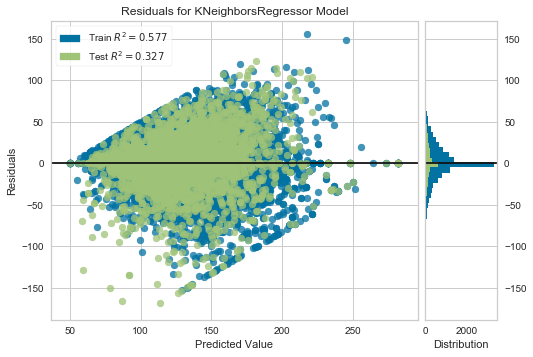

In [4]:
# K NeighborsReg:

from sklearn.neighbors import KNeighborsRegressor

steps = [
    ('scaler', StandardScaler()),
    ('normalizer', MinMaxScaler()),
    ('KNReg', KNeighborsRegressor())]

pipeline = Pipeline(steps)

KNReg_scaled = pipeline.fit(X_train, y_train)
y_pred = KNReg_scaled.predict(X_test)

metric_KNReg = total_validation(y_test, y_pred)

print(metric_KNReg)

_ = sns.scatterplot(y_test, y_pred)
_ = plt.xlim(50, 300)
_ = plt.ylabel('y_test')
_ = plt.xlabel('y_pred')
plt.show()

_ = sns.distplot(y_test, color = 'red', label = 'True values')
_ = sns.distplot(y_pred, color = 'blue', label = 'Predicited values')
_ = plt.title('y_test')
_ = plt.legend(loc = 7)
_ = plt.xlim(50, 300)
plt.show()

visualizer = PredictionError(pipeline)
visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)  
visualizer.show()

visualizer = ResidualsPlot(pipeline)
visualizer.fit(X_train, y_train) 
visualizer.score(X_test, y_test)  
visualizer.show() 

                value
MAE             15.78
MAPE (%)        12.88
MSE            966.06
RMSE (Units)    31.08
r-squared (%)   39.54


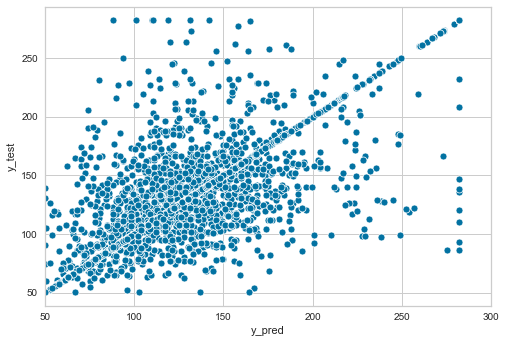

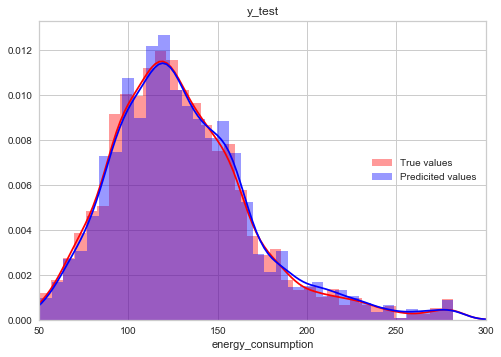

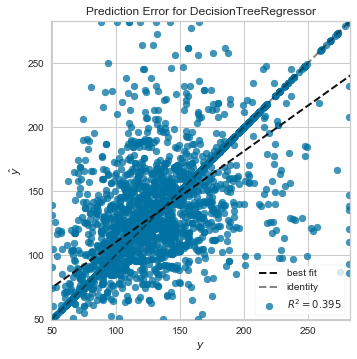

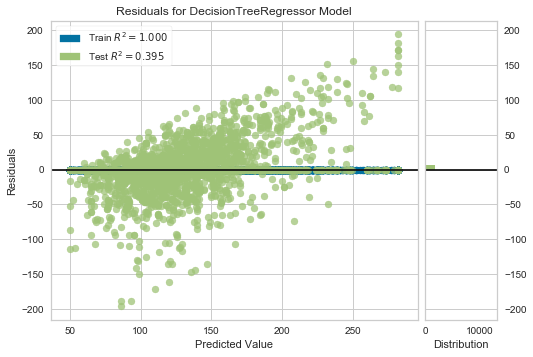

In [5]:
# DTReg:

from sklearn.tree import DecisionTreeRegressor

steps = [
    ('scaler', StandardScaler()),
    ('normalizer', MinMaxScaler()),
    ('DTReg', DecisionTreeRegressor())]

pipeline = Pipeline(steps)

DTReg_scaled = pipeline.fit(X_train, y_train)
y_pred = DTReg_scaled.predict(X_test)

metric_DTReg = total_validation(y_test, y_pred)

print(metric_DTReg)

_ = sns.scatterplot(y_test, y_pred)
_ = plt.xlim(50, 300)
_ = plt.ylabel('y_test')
_ = plt.xlabel('y_pred')
plt.show()

_ = sns.distplot(y_test, color = 'red', label = 'True values')
_ = sns.distplot(y_pred, color = 'blue', label = 'Predicited values')
_ = plt.title('y_test')
_ = plt.legend(loc = 7)
_ = plt.xlim(50, 300)
plt.show()

visualizer = PredictionError(pipeline)
visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)  
visualizer.show()

visualizer = ResidualsPlot(pipeline)
visualizer.fit(X_train, y_train) 
visualizer.score(X_test, y_test)  
visualizer.show()  

                 value
MAE              25.62
MAPE (%)         20.77
MSE            1281.31
RMSE (Units)     35.80
r-squared (%)    19.81


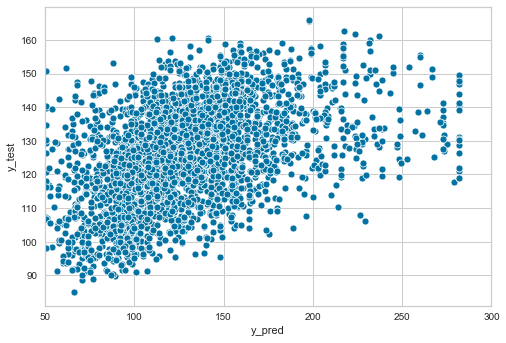

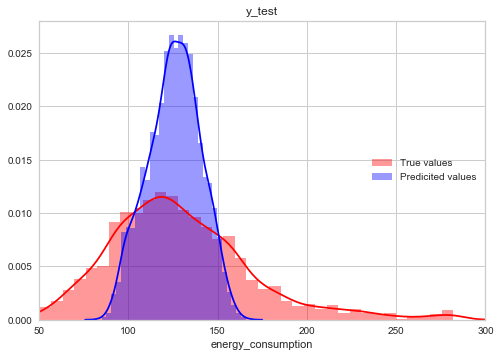

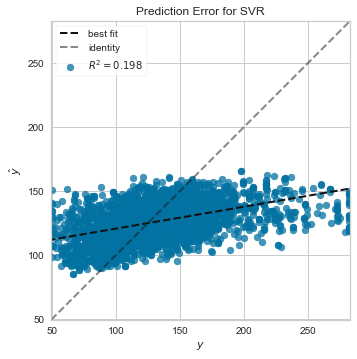

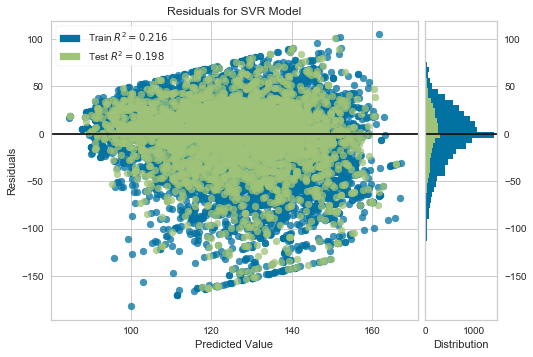

In [6]:
# SVMReg:

from sklearn.svm import SVR

steps = [
    ('scaler', StandardScaler()),
    ('normalizer', MinMaxScaler()),
    ('SVMReg', SVR())]

pipeline = Pipeline(steps)

SVMReg_scaled = pipeline.fit(X_train, y_train)
y_pred = SVMReg_scaled.predict(X_test)

metric_SVMReg = total_validation(y_test, y_pred)

print(metric_SVMReg)

_ = sns.scatterplot(y_test, y_pred)
_ = plt.xlim(50, 300)
_ = plt.ylabel('y_test')
_ = plt.xlabel('y_pred')
plt.show()

_ = sns.distplot(y_test, color = 'red', label = 'True values')
_ = sns.distplot(y_pred, color = 'blue', label = 'Predicited values')
_ = plt.title('y_test')
_ = plt.legend(loc = 7)
_ = plt.xlim(50, 300)
plt.show()

visualizer = PredictionError(pipeline)
visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)  
visualizer.show()

visualizer = ResidualsPlot(pipeline)
visualizer.fit(X_train, y_train) 
visualizer.score(X_test, y_test)  
visualizer.show() 

                value
MAE             17.82
MAPE (%)        14.96
MSE            762.89
RMSE (Units)    27.62
r-squared (%)   52.26


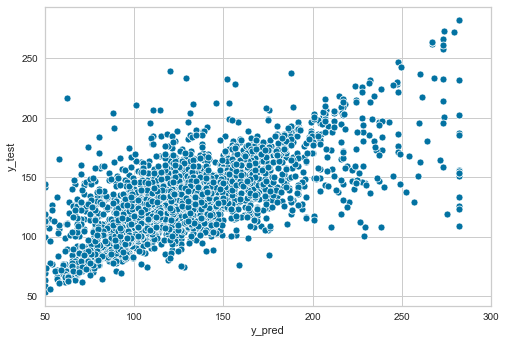

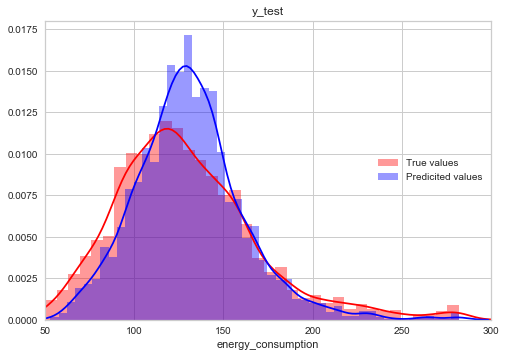

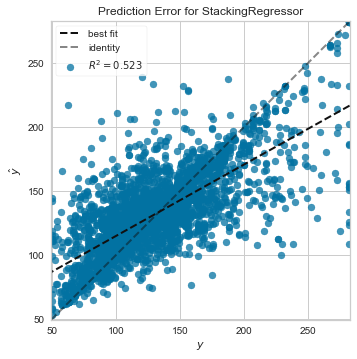

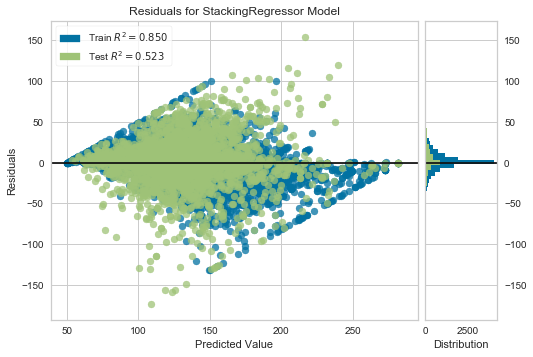

In [7]:
# Stacker:

from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import RandomForestRegressor

estimators = [
    ('LinReg', LinearRegression()),
    ('ElasticNet', ElasticNet()),
    ('KNReg', KNeighborsRegressor()),
    ('DTReg', DecisionTreeRegressor(random_state=42)),
    ('SVMReg', SVR())
]

steps = [
    ('scaler', StandardScaler()),
    ('normalizer', MinMaxScaler()),
    ('Stacker', StackingRegressor(
    estimators = estimators,
    final_estimator = RandomForestRegressor(random_state=42)))]

pipeline = Pipeline(steps)

stacker_scaled = pipeline.fit(X_train, y_train)
y_pred = stacker_scaled.predict(X_test)

metric_Stacker = total_validation(y_test, y_pred)

print(metric_Stacker)

_ = sns.scatterplot(y_test, y_pred)
_ = plt.xlim(50, 300)
_ = plt.ylabel('y_test')
_ = plt.xlabel('y_pred')
plt.show()

_ = sns.distplot(y_test, color = 'red', label = 'True values')
_ = sns.distplot(y_pred, color = 'blue', label = 'Predicited values')
_ = plt.title('y_test')
_ = plt.legend(loc = 7)
_ = plt.xlim(50, 300)
plt.show()

visualizer = PredictionError(pipeline)
visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)  
visualizer.show()

visualizer = ResidualsPlot(pipeline)
visualizer.fit(X_train, y_train) 
visualizer.score(X_test, y_test)  
visualizer.show() 

In [8]:
metric_all = pd.concat([metric_LinReg, metric_ElasticNet, metric_KNReg, metric_DTReg, metric_SVMReg,metric_Stacker], axis=1)
metric_all.columns = ['LinReg','ElasticNet','KNReg','DTReg','SVMReg','Stacker']

print(metric_all)

                LinReg  ElasticNet    KNReg   DTReg   SVMReg  Stacker
MAE              25.83       29.18    22.68   15.78    25.62    17.82
MAPE (%)         21.67       24.97    19.01   12.88    20.77    14.96
MSE            1223.72     1481.84  1075.80  966.06  1281.31   762.89
RMSE (Units)     34.98       38.49    32.80   31.08    35.80    27.62
r-squared (%)    23.42        7.26    32.67   39.54    19.81    52.26


                value
MAE             14.03
MAPE (%)        11.69
MSE            512.81
RMSE (Units)    22.65
r-squared (%)   67.91


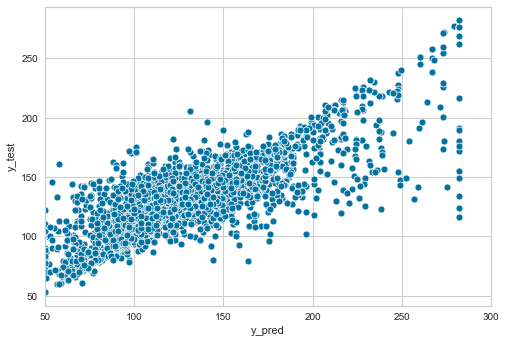

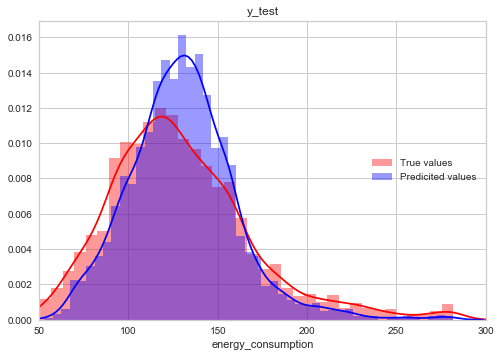

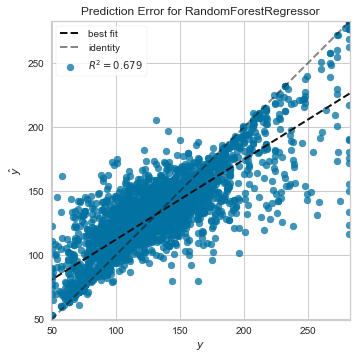

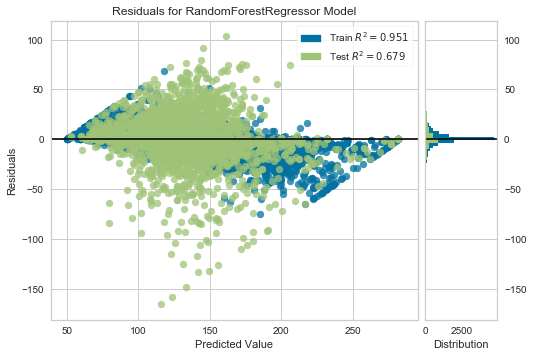

In [9]:
# RandomForestReg:

from sklearn.ensemble import RandomForestRegressor

steps = [
    ('scaler', StandardScaler()),
    ('normalizer', MinMaxScaler()),
    ('RFReg', RandomForestRegressor(random_state=42))]

pipeline = Pipeline(steps)

RFReg_scaled = pipeline.fit(X_train, y_train)
y_pred = RFReg_scaled.predict(X_test)

metric_RFReg = total_validation(y_test, y_pred)

print(metric_RFReg)

_ = sns.scatterplot(y_test, y_pred)
_ = plt.xlim(50, 300)
_ = plt.ylabel('y_test')
_ = plt.xlabel('y_pred')
plt.show()

_ = sns.distplot(y_test, color = 'red', label = 'True values')
_ = sns.distplot(y_pred, color = 'blue', label = 'Predicited values')
_ = plt.title('y_test')
_ = plt.legend(loc = 7)
_ = plt.xlim(50, 300)
plt.show()

visualizer = PredictionError(pipeline)
visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)  
visualizer.show()

visualizer = ResidualsPlot(pipeline)
visualizer.fit(X_train, y_train) 
visualizer.score(X_test, y_test)  
visualizer.show() 

                 value
MAE              29.97
MAPE (%)         25.76
MSE            1556.30
RMSE (Units)     39.45
r-squared (%)     2.60


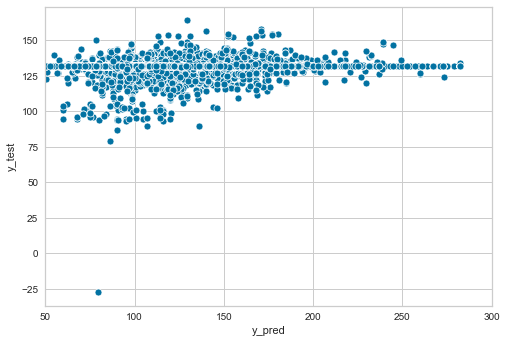

C:\Users\test\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


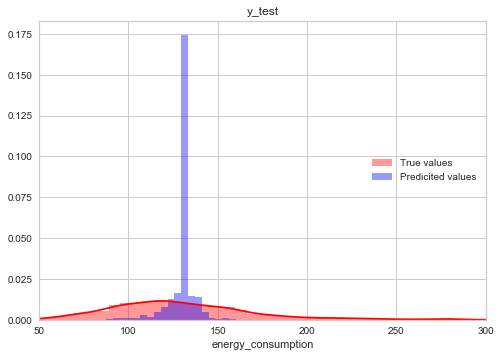

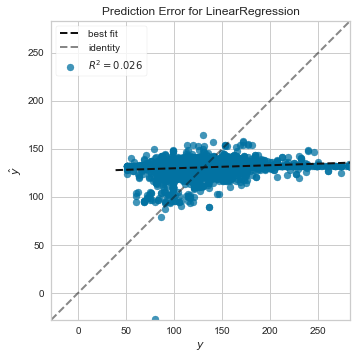

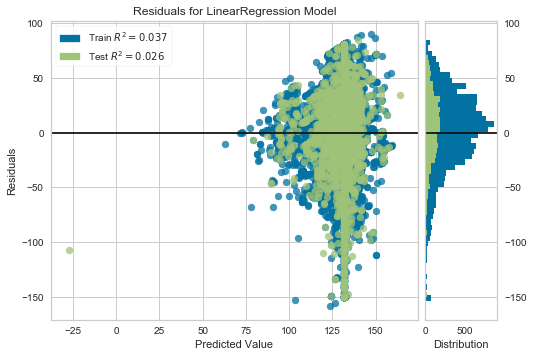

In [18]:
# TEST MIT AUSSCHLIEßLICH NLP-Daten:

import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from validation_metric import total_validation
import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.regressor import ResidualsPlot
from yellowbrick.regressor import PredictionError


#load data
df = pd.read_csv("C:/Users/test/Documents/GitHub/bachelorarbeit/_climate_change_mitigation/data/processed/berlin_preprocessed.csv")

# Drop 'cost_total' due to high correlation -> colliniarity?
df = df.drop('cost_total', axis=1)

# split data
X = df.iloc[:,82:150]
y = df.iloc[:,0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# LinReg:

from sklearn.linear_model import LinearRegression

steps = [
    ('scaler', StandardScaler()),
    ('normalizer', MinMaxScaler()),
    ('LinReg', LinearRegression())]

pipeline = Pipeline(steps)

LinReg_scaled = pipeline.fit(X_train, y_train)
y_pred = LinReg_scaled.predict(X_test)

metric_LinReg = total_validation(y_test, y_pred)

print(metric_LinReg)


_ = sns.scatterplot(y_test, y_pred)
_ = plt.xlim(50, 300)
_ = plt.ylabel('y_test')
_ = plt.xlabel('y_pred')
plt.show()

_ = sns.distplot(y_test, color = 'red', label = 'True values') #, rug=True
_ = sns.distplot(y_pred, color = 'blue', label = 'Predicited values')
_ = plt.title('y_test')
_ = plt.legend(loc = 7)
_ = plt.xlim(50, 300)
plt.show()

visualizer = PredictionError(pipeline)
visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)  
visualizer.show()

visualizer = ResidualsPlot(pipeline)
visualizer.fit(X_train, y_train) 
visualizer.score(X_test, y_test)  
visualizer.show() 

In [14]:
df.iloc[:,82:100].describe()

,270,481,717,229,1167,396,1035,1161,758,387,405,219,916,584,1180,768,82,991
count,16911.000000,16911.000000,16911.000000,16911.000000,16911.000000,16911.000000,16911.000000,16911.000000,16911.000000,16911.000000,16911.000000,16911.000000,16911.000000,16911.000000,16911.000000,16911.000000,16911.000000,16911.000000
mean,0.001671,0.001685,0.001775,0.001752,0.001702,0.001548,0.001774,0.001522,0.001733,0.001915,0.001612,0.001864,0.001757,0.001560,0.001438,0.001485,0.001813,0.001541
std,0.015202,0.015202,0.015583,0.015477,0.015408,0.015027,0.016238,0.015158,0.016747,0.016029,0.015325,0.015483,0.015782,0.015266,0.013788,0.013842,0.016785,0.015212
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.176757,0.176123,0.210039,0.199669,0.240426,0.198191,0.295478,0.211892,0.478898,0.217587,0.266820,0.195804,0.226720,0.210609,0.180813,0.349104,0.427451,0.211245


In [16]:
y_pred

array([130.63601352, 130.63601352, 130.63601352, ..., 130.63601352,
       130.63601352, 130.63601352])